In [1]:
library("latex2exp")
library("ellipse")
library("RVAideMemoire")
library("MVN")
library("car")
library("MVTests")
library("SciViews")


Attaching package: 'ellipse'


The following object is masked from 'package:graphics':

    pairs


*** Package RVAideMemoire v 0.9-81-2 ***

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:ellipse':

    ellipse



Attaching package: 'MVTests'


The following object is masked from 'package:datasets':

    iris




# 1. Independen 2 Population

In [2]:
#Data
A_EfisiensiTanpa<-c(12,13,12.5,10,14,13.5,12,15,11,13,11.5,13.5,10,11)
A_EfisiensiDengan<-c(13,15,14,11,14.5,15,14.5,18,14.5,15,13.5,14,11,13)
A_AkselerasiTanpa<-c(16,15,14,16,17,19,15,17,14,15,18,19,16,17)
A_AkselerasiDengan<-c(17,15,16,16,16,20,14,18,15,15,17,20,16,17)

B_EfisiensiTanpa<-c(13,12,14,12.5,10,12,13.5,14,13,10,12,10,13.5,11)
B_EfisiensiDengan<-c(15,15.5,17,16,12,15,16.5,15.5,15,13,14,12.5,15,13.5)
B_AkselerasiTanpa<-c(15,16,17,14,16,19,17,15,13,18,15,20,17,18)
B_AkselerasiDengan<-c(13,13,14,11,13,15,15,12,12,15,11,15,15,16)

In [3]:
data <- data.frame(A_EfisiensiTanpa, A_EfisiensiDengan, A_AkselerasiTanpa, A_AkselerasiDengan,
                   B_EfisiensiTanpa, B_EfisiensiDengan, B_AkselerasiTanpa, B_AkselerasiDengan)
data

A_EfisiensiTanpa,A_EfisiensiDengan,A_AkselerasiTanpa,A_AkselerasiDengan,B_EfisiensiTanpa,B_EfisiensiDengan,B_AkselerasiTanpa,B_AkselerasiDengan
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.0,13.0,16,17,13.0,15.0,15,13
13.0,15.0,15,15,12.0,15.5,16,13
12.5,14.0,14,16,14.0,17.0,17,14
10.0,11.0,16,16,12.5,16.0,14,11
14.0,14.5,17,16,10.0,12.0,16,13
13.5,15.0,19,20,12.0,15.0,19,15
12.0,14.5,15,14,13.5,16.5,17,15
15.0,18.0,17,18,14.0,15.5,15,12
11.0,14.5,14,15,13.0,15.0,13,12


In [14]:
#Diferensiasi
d_A_Efisiensi <- A_EfisiensiDengan - A_EfisiensiTanpa
d_A_Akselerasi <- A_AkselerasiDengan - A_AkselerasiTanpa

d_B_Efisiensi <- B_EfisiensiDengan - B_EfisiensiTanpa
d_B_Akselerasi <- B_AkselerasiDengan - B_AkselerasiTanpa

diff_A <- data.frame(d_A_Efisiensi, d_A_Akselerasi)
diff_B <- data.frame(d_B_Efisiensi, d_B_Akselerasi)
diff_data <- data.frame(d_A_Efisiensi, d_A_Akselerasi, d_B_Efisiensi, d_B_Akselerasi)
diff_data

d_A_Efisiensi,d_A_Akselerasi,d_B_Efisiensi,d_B_Akselerasi
<dbl>,<dbl>,<dbl>,<dbl>
1.0,1,2.0,-2
2.0,0,3.5,-3
1.5,2,3.0,-3
1.0,0,3.5,-3
0.5,-1,2.0,-3
1.5,1,3.0,-4
2.5,-1,3.0,-2
3.0,1,1.5,-3
3.5,1,2.0,-1


In [46]:
d_A_Efisiensi <- A_EfisiensiDengan - A_EfisiensiTanpa
d_A_Akselerasi <- A_AkselerasiDengan - A_AkselerasiTanpa

d_B_Efisiensi <- B_EfisiensiDengan - B_EfisiensiTanpa
d_B_Akselerasi <- B_AkselerasiDengan - B_AkselerasiTanpa

In [21]:
dbar_A <- colMeans(diff_A)
dbar_A

d_A_Efisiensi d_A_Akselerasi 
     1.7142857      0.2857143

In [22]:
dbar_B <- colMeans(diff_B)
dbar_B

d_B_Efisiensi d_B_Akselerasi 
      2.500000      -2.857143

In [15]:
S_A <- cov(diff_A)
S_A

,d_A_Efisiensi,d_A_Akselerasi
d_A_Efisiensi,0.79670330,0.04945055
d_A_Akselerasi,0.04945055,0.83516484


In [16]:
S_B <- cov(diff_B)
S_B

,d_B_Efisiensi,d_B_Akselerasi
d_B_Efisiensi,0.4615385,-0.1538462
d_B_Akselerasi,-0.1538462,1.0549451


In [24]:
n1 <- 14
n2 <- 14
S_pooled <- ((n1 - 1)/(n1 + n2 -2) * S_A) + ((n2 - 1)/(n1 + n2 -2) * S_B)
S_pooled

,d_A_Efisiensi,d_A_Akselerasi
d_A_Efisiensi,0.6291209,-0.0521978
d_A_Akselerasi,-0.0521978,0.9450549


In [25]:
mu <- c(0,0)
T_square <- t((dbar_A - dbar_B) - mu) %*% solve(((1/n1) + (1/n2)) * S_pooled) %*% ((dbar_A - dbar_B) - mu)
T_square

77.35112


In [35]:
p <- 2
alpha <- 0.05 
Ftable <- qf(1 - alpha, df1 = p, df2 = n1 + n2 - p - 1) %*% (n1 + n2 - 2) %*% p / (n1 + n2 - p - 1)
Ftable

7.041195


## Confidence Interval Simultaneous

In [51]:
bottom_Efisiensi <-  dbar_A[1]-dbar_B[1] - Ftable*sqrt(((1/n1)+(1/n2))*S_pooled[1,1])
upper_Efisiensi <- dbar_A[1]-dbar_B[1] + Ftable*sqrt(((1/n1)+(1/n2))*S_pooled[1,1])
bottom_Efisiensi
upper_Efisiensi

-2.896598


1.32517


In [52]:
bottom_Akselerasi <-  dbar_A[2]-dbar_B[2] - Ftable*sqrt(((1/n1)+(1/n2))*S_pooled[2,2])
upper_Akselerasi <- dbar_A[2]-dbar_B[2] + Ftable*sqrt(((1/n1)+(1/n2))*S_pooled[2,2])
bottom_Akselerasi
upper_Akselerasi

0.5556816


5.730033


In [56]:
diff_data

d_A_Efisiensi,d_A_Akselerasi,d_B_Efisiensi,d_B_Akselerasi
<dbl>,<dbl>,<dbl>,<dbl>
1.0,1,2.0,-2
2.0,0,3.5,-3
1.5,2,3.0,-3
1.0,0,3.5,-3
0.5,-1,2.0,-3
1.5,1,3.0,-4
2.5,-1,3.0,-2
3.0,1,1.5,-3
3.5,1,2.0,-1


In [57]:
mvn(data = diff_data, multivariatePlot = 'plot', showOutliers = TRUE)

$multivariateNormality
           Test        HZ   p value MVN
1 Henze-Zirkler 0.7089232 0.2926107 YES

$univariateNormality
              Test       Variable Statistic   p value Normality
1 Anderson-Darling d_A_Efisiensi     0.3384    0.4475    YES   
2 Anderson-Darling d_A_Akselerasi    0.7392    0.0412    NO    
3 Anderson-Darling d_B_Efisiensi     0.5324    0.1420    YES   
4 Anderson-Darling d_B_Akselerasi    0.6329    0.0784    YES   

$Descriptives
                n       Mean   Std.Dev Median  Min  Max 25th 75th        Skew
d_A_Efisiensi  14  1.7142857 0.8925824   1.75  0.5  3.5    1    2  0.37205538
d_A_Akselerasi 14  0.2857143 0.9138735   0.00 -1.0  2.0    0    1  0.03437875
d_B_Efisiensi  14  2.5000000 0.6793662   2.50  1.5  3.5    2    3  0.00000000
d_B_Akselerasi 14 -2.8571429 1.0271052  -3.00 -5.0 -1.0   -3   -2 -0.25830473
                 Kurtosis
d_A_Efisiensi  -0.9246657
d_A_Akselerasi -1.1393663
d_B_Efisiensi  -1.4910714
d_B_Akselerasi -0.5255368

$multivariateOutliers
NULL

$multivariateOutliers
NULL


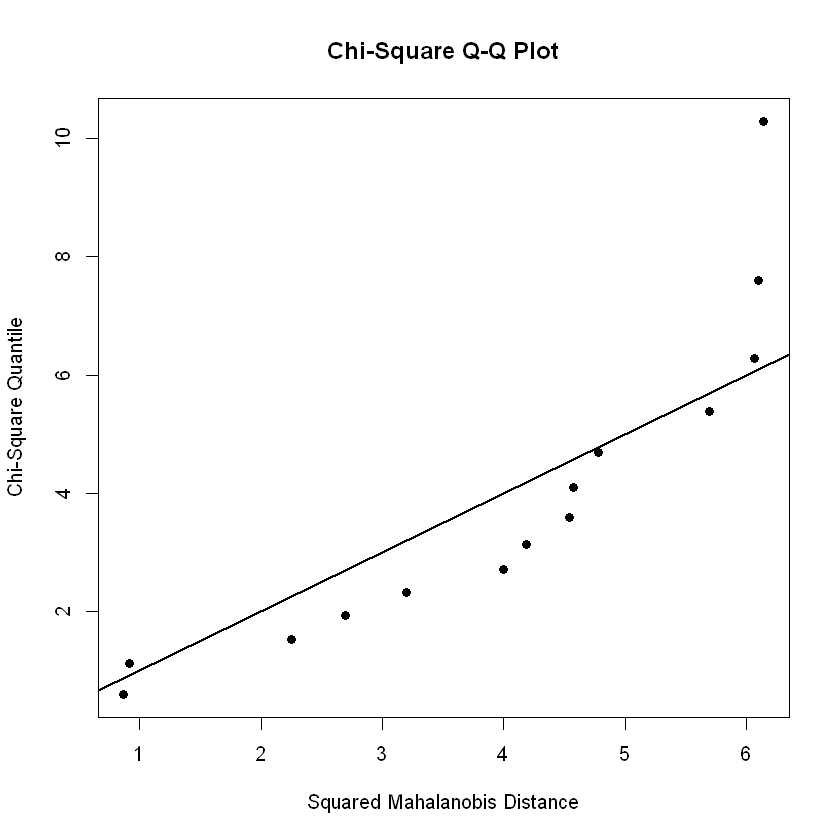

In [58]:
mvn(diff_data, multivariatePlot = "qq", showOutliers = TRUE)[4]

# 2. Manova

In [61]:
Bank<-c('A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y')
NPL<-c(9,10,15,14,16,21,8,6,5,6,7,8,7,6.5,2,4,4,1,3,2.4,3.2,5,1.6,3,2)
LDR<-c(101,110,115,106,120,118,100,82,85,80,90,95,82,85,60,72,70,62,70,68,73,78,65,75,58)
ROA<-c(0.2,0.8,0.5,1.2,1.8,1.3,0.9,0.7,1.4,1.5,0.9,1.3,2,2.5,0.4,0.75,1.4,1.1,0.9,1.6,0.4,1.5,2.4,1.2,0.8)
CAR<-c(8.5,6.2,4.5,5.2,7.6,5.8,6.8,7.5,8.4,8.2,9,6.4,5.8,8.4,7.9,8.1,7,8.5,9,12,7.4,8,7,9.2,6.4)
Rating<-c(1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3)
dataBank<- data.frame(Bank,NPL,LDR,ROA,CAR,Rating)
dataBank

Bank,NPL,LDR,ROA,CAR,Rating
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,9.0,101,0.20,8.5,1
B,10.0,110,0.80,6.2,1
C,15.0,115,0.50,4.5,1
D,14.0,106,1.20,5.2,1
E,16.0,120,1.80,7.6,1
F,21.0,118,1.30,5.8,1
G,8.0,100,0.90,6.8,2
H,6.0,82,0.70,7.5,2
I,5.0,85,1.40,8.4,2


In [62]:
X <- as.matrix(dataBank[,c("NPL","LDR","ROA","CAR")])
rating <- as.factor(dataBank$Rating)
model <- lm(X ~ rating)
BankManova <- manova(model)
BankManova

Call:
   manova(model)

Terms:
                 rating Residuals
NPL             498.519   116.368
LDR             7388.61   1023.39
ROA               0.686     7.695
CAR              14.422    43.221
Deg. of Freedom       2        22

Residual standard errors: 2.299877 6.820391 0.5914042 1.401632
Estimated effects may be unbalanced

In [63]:
summary(BankManova, test="Wilks")

          Df    Wilks approx F num Df den Df    Pr(>F)    
rating     2 0.092804   10.842      8     38 8.606e-08 ***
Residuals 22                                              
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [64]:
summary.aov(BankManova)

 Response NPL :
            Df Sum Sq Mean Sq F value    Pr(>F)    
rating       2 498.52 249.259  47.124 1.115e-08 ***
Residuals   22 116.37   5.289                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response LDR :
            Df Sum Sq Mean Sq F value    Pr(>F)    
rating       2 7388.6  3694.3  79.417 8.641e-11 ***
Residuals   22 1023.4    46.5                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response ROA :
            Df Sum Sq Mean Sq F value Pr(>F)
rating       2 0.6857 0.34285  0.9803  0.391
Residuals   22 7.6947 0.34976               

 Response CAR :
            Df Sum Sq Mean Sq F value  Pr(>F)  
rating       2 14.422  7.2109  3.6705 0.04211 *
Residuals   22 43.221  1.9646                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
